In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam


In [32]:
# import the data 
train = pd.read_csv("/train.csv")
test = pd.read_csv("/test.csv")

In [33]:
# split data into label (Y) and features (X)
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1) 

In [34]:
# normalize pixel values so they are from 0-1 instead of 0-255
X_train = X_train / 255
test = test / 255

In [35]:
# X_train.shape returns (42000, 784)
# reshape the data so that the images are in 3 dimensions, rather than just 1
X_train = X_train.values.reshape(-1, 28, 28, 1) # image is 28x28 with 1 color chanel (black or white)
test = test.values.reshape(-1, 28, 28, 1)

In [36]:
# encode so the predictions come out as one class only
Y_train = to_categorical(Y_train, num_classes=10)

In [37]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = .2)


In [38]:
# build the model
model = Sequential()

# input layer
model.add(Conv2D(64, (3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))

# output layer
model.add(Dense(10, activation="softmax"))

In [39]:
# compile the model
model.compile(loss="categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

In [40]:
# fit the model
epochs = 8
model.fit(X_train, Y_train, batch_size = 96, epochs = epochs, validation_data = (X_test, Y_test))

Epoch 1/8
350/350 [==============================] - 25s 69ms/step - loss: 0.2735 - accuracy: 0.9159 - val_loss: 0.0903 - val_accuracy: 0.9721
Epoch 2/8
350/350 [==============================] - 24s 67ms/step - loss: 0.0702 - accuracy: 0.9779 - val_loss: 0.0735 - val_accuracy: 0.9774
Epoch 3/8
350/350 [==============================] - 23s 66ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0573 - val_accuracy: 0.9821
Epoch 4/8
350/350 [==============================] - 24s 67ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0556 - val_accuracy: 0.9831
Epoch 5/8
350/350 [==============================] - 23s 67ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0473 - val_accuracy: 0.9863
Epoch 6/8
350/350 [==============================] - 23s 67ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0499 - val_accuracy: 0.9861
Epoch 7/8
350/350 [==============================] - 23s 66ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0462 - val_accuracy: 0.9863

In [41]:
# check for overfitting 
history = model.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

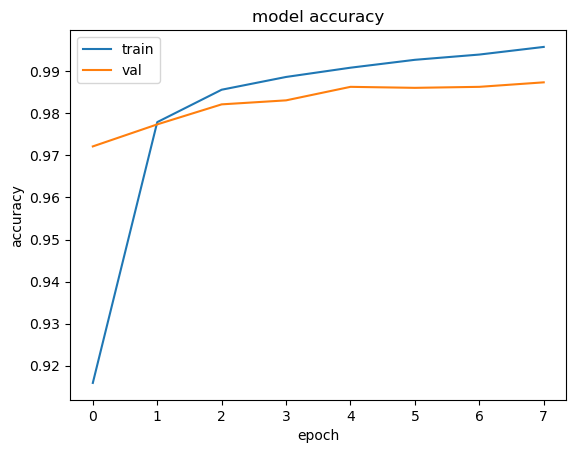

In [42]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

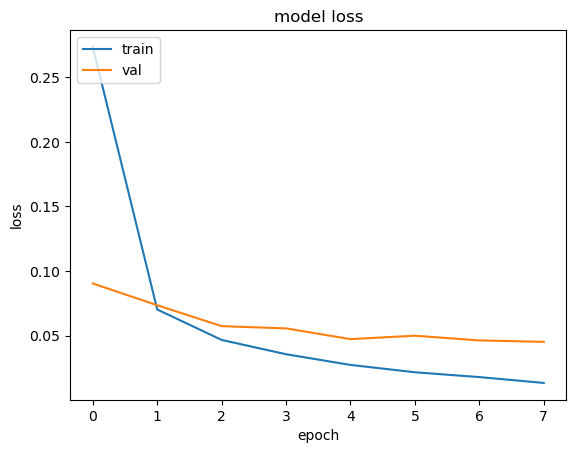

In [43]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()